# Project: Investigate a Dataset (TMDb)
The main goal of te project is to load the data, wrangle data and visualize it after doing analysis on different features.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset
I have chosen The Movie Database (TMDb). This dataset contains data about movies, their relaese dates, their ratings, viewrs reviews etc.
> * The data contains 10866 observations each having 21 attributes.

### Research Questions
These are the questions that needed to be answered :
1. What are the top ten moies with most profit and most loss?
1. Which movies have highest budget?
1. What are the top longest movies?
1. What is average runtime of movies from year to year?
1. Which year has the highest average profit?
1. What is the average runtime liked by people?

First of all import the required libraries. As it is required for the project we will import pandas, numpy and matplotlib.

In [1]:
# import the required libraries 

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # interactive visusalizations
import matplotlib as mpl # data visualizations
import matplotlib.pyplot as plt # ploting
from matplotlib import gridspec # grid of the plot

# magic function
%matplotlib inline  

pd.set_option('display.max_columns', None) # dataframe display option

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data would be loaded in, checked for cleanliness, and then trimed and cleaned for analysis. Clear documentation has been made in the form of comments and markdowns to justify cleaning decisions.

### General Properties
Load the data set and see its column properties with info() function.

In [2]:
df = pd.read_csv('tmdb-movies.csv') # Load your data
df.info() # print the information related the data set columns and its types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Briefly explore the top and last rows of the dataset.

In [3]:
df.head() # display first five rows of the dataset

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [4]:
df.shape # shape of the dataframe

(10866, 21)

In [5]:
df.tail(2) # display last 2 values of the dataset

id    imdb_id  popularity  budget  revenue  \
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

               director                                       tagline  \
10864       Woody Allen                     WOODY ALLEN STRIKES BACK!   
10865  Harold P. Warren  It's Shocking! It's Beyond Your Imagination!   

                                  keywords  \
10864                                spoof   
10865  fire|gun|drive|sacrifice|flashlight   

                                                overview  runtime  \
10864  In comic Woody Allen's film debut, he took the...       80   
10865  A family gets lost on the road and stumbles up...       74   

              genres     production_companies release_date  vote_count  \
10864  Action|Comedy  Benedict Pictures Corp.      11/2/66          22   
10865         Horror                Norm-Iris     11/15/66          15   

       vote_average  release_year     budget_adj  revenue_adj  
10864           5.4          1966       0.000000          0.0  
10865           1.5          1966  127642.279154          0.0

The descriptive statistics of the dataset can be seen with the help of describe function.

In [6]:
df.describe() # show the summary statistics of the data

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

See whether there are any null values or not.

In [7]:
df.isna().sum() # see the total number values in each column that are null.

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning
As there are many null values in the data we need to clean the data. There are four steps in cleaning this data.
#### 1. Remove duplicate rows

In [8]:
sum(df.duplicated()) # numbe rof rows that are duplicated

1

In [9]:
df.drop_duplicates(inplace = True) # drop duplicated rows
df.shape # shape of the data frame after remving the duplicated rows

(10865, 21)

Duplicated vales of the datset were checked and removed.

#### 2. Changing format of release date

In [10]:
df['release_date'] = pd.to_datetime(df['release_date']) # using the pandas datetime function cahnge the column data type to datetime
df['release_date'].head() # show the date column

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Date format needed to be corrected so that it is easy to process the data as a time.

#### 3. Remove unneeded columns

In [11]:
df.drop(['imdb_id','homepage','tagline','budget_adj','revenue_adj'],axis =1,inplace = True) # remove the column that are not needed in the analysis
df.shape # shape after droping extra columns

(10865, 16)

Some colmn were not be used in the analysis so it is better ppractice to delete the 

#### 4. Droping rows

In [12]:
print(df[df['budget']<=0].shape[0]) # Droping the rows with inappropriate budget amount
print(df[df['revenue']<=0].shape[0]) # Droping the rows with inappropriate revenue amount

5696
6016


The rows wih negative budget were rmoved now NAN values should be filed with zero.

In [13]:
df.fillna(0) # filling NAN with zero
df.info() # concise summary after droping rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

EDA part was used for exploring different aspects of the data using these 6 different features.

### Research Question 1 : What are the top ten moies with most profit and most loss?
Most of the questions asked are related to eiter top ten rating with respect to other features. So, horizontal charts would be more then enough to show these features. While on the other hand, some of the features are time variant so a line charts with shadded area under the curve would be helpful so that the shadded are denotes the summ of all the values and the height of the line at each point denotes the value of the dependent varaible.

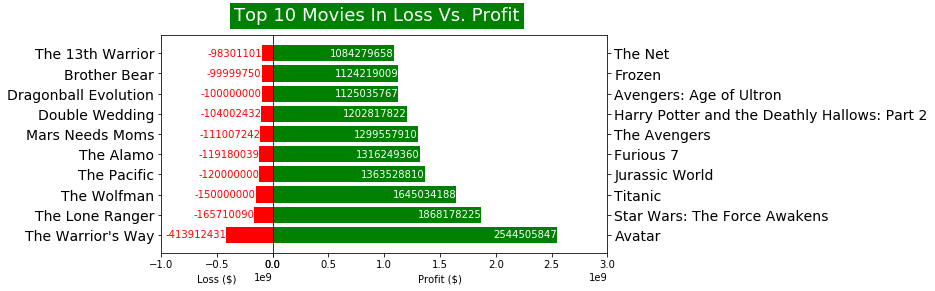

In [14]:
df['profit'] = df['revenue'] - df['budget'] # add new feature of profit

# method 1
# df[['original_title','budget']][df['budget']==df['budget'].max()]
# x=df[['original_title','budget']].sort_values(by='budget',ascending=False)
# x.head()

# method 2
# info = pd.DataFrame(df['profit'].sort_values(ascending = False))
# info['original_title'] = df['original_title']
# data = list(map(str,(info['original_title'])))
# x = list(data[:10])
# y = list(info['profit'][:10])

# method 3
p_title=df.nlargest(10, ['profit'])['original_title'] # extract the titles of ten largest profit values
profit=df.nlargest(10, ['profit'])['profit'] # extract the profit of 10 largest profit values
l_title=df.nsmallest(10, ['profit'])['original_title'] # extract the titles of ten smallest profit values
loss=df.nsmallest(10, ['profit'])['profit'] # extract the loss of 10 largest loss values
fig = plt.figure(figsize=(8,4)) # define the plot
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) # define the ratio of the subplots
plt.suptitle('top 10 movies in loss vs. Profit'.title(),
                 fontsize=18,
                 color='white',
                 bbox=dict(facecolor='green',edgecolor='none'))# title of the complete chart

ax1 = fig.add_subplot(gs[0]) # define loss chart inside super plot
ax1.barh(l_title,loss,color='red') # define the horizontal bar chart for loss with red color
plt.xlim(-1e9,0) # define the range of the x axis 
# ax1.ticklabel_format(useOffset=False,style='plain',axis='x')
# plt.xticks(rotation=90)
plt.yticks(fontsize=14) # change the font size for ticks
plt.xlabel("Loss ($)") # label the x axis
for i, v in enumerate(loss):
    plt.text(v,i, str(round(v, 2)), color='red', va="center", ha='right')

ax2 = fig.add_subplot(gs[1]) # define profit chart inside the super plot
ax2.barh(p_title,profit,color='green') # define a horizontal bar chart for profit with green color
ax2.yaxis.tick_right() # move the y ticks for the sencond subplot
# ax2.ticklabel_format(useOffset=True,style='plain',axis='x')
# plt.xticks(rotation=90)
plt.xlim(0,3e9) # define limits for x axis
plt.yticks(fontsize=14) # change the font size for ticks
plt.xlabel("Profit ($)") # label the x axis
for i, v in enumerate(profit):
    plt.text(v,i, str(round(v, 2)), color='white', va="center", ha='right')

plt.subplots_adjust(wspace=0) # remove the empty space between subplots
plt.show() # show the plots

These bar chart show that most profitable movie of all time was **Avatar** with ~ \$2.5+B profit and the most unprofitable movie was **The Warrior's Way** with ~\$-0.4+B loss.

### Research Question 2 : Which movies have highest budget?

As we are going to analyze the data for two questions of approximately same type that is why it is good to make a function for genrated the chart.

In [15]:
# define a function for bar chart of top te values from the given feature
def top_ten(x,y):
    ptitle=df.nlargest(10, [x])['original_title'] # extract the titles for top values
    profit=df.nlargest(10, [x])[x] # extract top values of the feature
    fig = plt.figure(figsize=(8,4)) # define a plot figure
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) # apply grid and define width ratio
    plt.suptitle('ten movies with highest '.title() + x.title(),
                 fontsize=18,
                 color='white',
                 bbox=dict(facecolor='green',
                           edgecolor='none')) # add title of the chart
    
    ax2 = fig.add_subplot(gs[1]) # define a subplot
    ax2.barh(ptitle,profit,color='green') # define the horizontal bar chart for the variables
    #ax2.yaxis.tick_right()
    # ax2.ticklabel_format(useOffset=True,style='plain',axis='x')
    # plt.xticks(rotation=90)
    plt.xlabel( x + " ("+y+")",fontsize=13) # define the label for x axis
    plt.yticks(fontsize=13) # defifne the font size
    for i, v in enumerate(df.nlargest(10, [x])[x]):
        plt.text(v,i, str(round(v, 2)), color='white', va="center", ha='right')
    
    sns.set_style(None) # remove style
    plt.subplots_adjust(wspace=0) # remove width
    plt.show() # show the chart

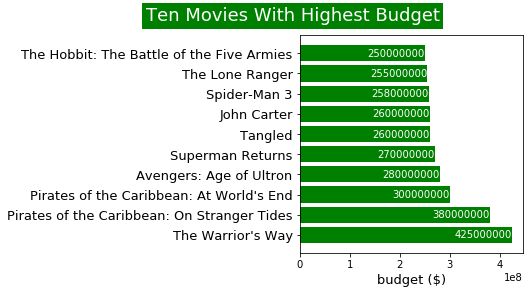

In [16]:
top_ten('budget','$') # plot the top 10 values of budget

This bar chart show that **The Warrior's Way** consumed the largest budget of all movies and it can be seen in the previous chart that it was also the movie with the highest loss.

### Research Question 3 : What are the top longest movies?

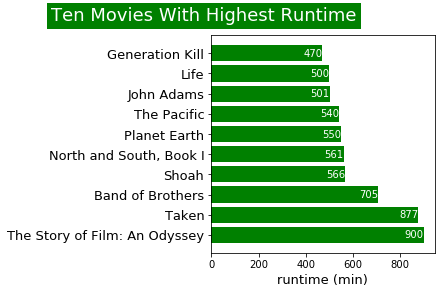

In [17]:
top_ten('runtime','min') # plot top 10 values of runtime

As shown from the chart, **The Story of Film: An Odyssey** is the movie with longest runtime. Its runtime is 900 minutes which is 15 hours.

### Research Question 3 : Which year has the highest release of movies?

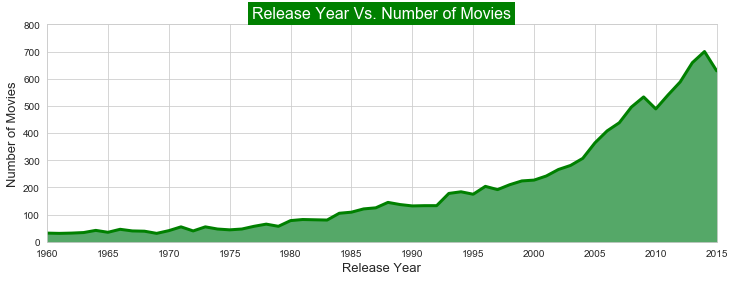

In [18]:
sns.set_style("whitegrid") # set the grid style

# plot the relaease date vs movies chart
df.groupby('release_year').count()['id'].plot(figsize = (12,4),xticks = np.arange(1960,2016,5),linewidth=3, color='green')
sns.set(rc={'figure.figsize':(10,5)}) # set the figure dimensions


# give the figure an appropriate title
plt.title("Release Year Vs. Number of Movies",fontsize=16,color='white',bbox=dict(facecolor='green',edgecolor='none')) # define a title for the chart
plt.ylim(0,800) # define limits for the y axis
# give the plot x-label and y-label.
plt.xlabel('Release Year',fontsize = 13) # define the label for x axis
plt.ylabel('Number of Movies',fontsize = 13) # define the label for y axis
plt.fill_between(df.groupby('release_year').count().index.tolist(),df.groupby('release_year').count()['id'].tolist(),color='g')
#for i, v in enumerate(df.groupby('release_year').count()['id']):
    #plt.text(1960+i,800, str(round(v,10)), color='green',rotation=90,bbox=dict(facecolor='white',edgecolor='none', boxstyle='round'))
plt.show() # show the plot

The chart shows that most number of movies released were in 2014 and the amount of movies realsed that year is 700. It also shows there number of movies released each year is increasing with time.

### Research Question 4: What is average runtime of movies from year to year?

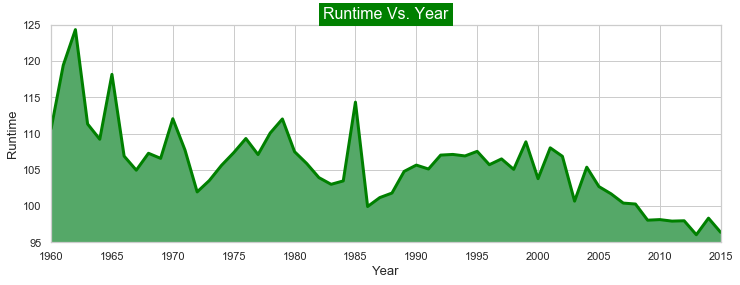

In [19]:
# show how the runtime of the movies differ year to year.

sns.set_style("whitegrid") # set the grid style

# make the group of the data according to their release_year, find its mean and plot it.
df.groupby('release_year').mean()['runtime'].plot(figsize = (12,4),xticks = np.arange(1960,2016,5),linewidth=3, color='green')

plt.title("Runtime Vs. Year",fontsize=16,color='white',bbox=dict(facecolor='green',edgecolor='none')) # give the figure an appropriate title

plt.xlabel('Year',fontsize = 13) # give the plot x-label
plt.ylabel('Runtime',fontsize = 13) # give the plot y-label
plt.fill_between(df.groupby('release_year').mean().index.tolist(),df.groupby('release_year').mean()['runtime'].tolist(),color='g')
#for i, v in enumerate(df.groupby('release_year').mean()['runtime']):
    #plt.text(1960+i,125, str(round(v,10)), color='green',rotation=90,bbox=dict(facecolor='white',edgecolor='none', boxstyle='round'))
plt.ylim(95,125) # set limits for the y axis
plt.show()

It is visible from this chart that the average runtime used to be high in the past and mximum average was 124 minutes in 1962 and minimum average was 96 in 2013.

### Research Question 5 : Which year has the highest average profit?

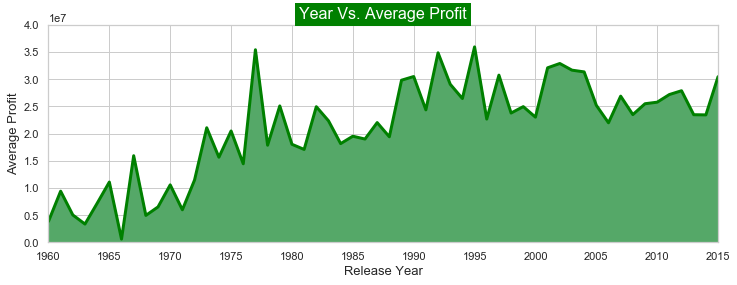

In [20]:
#do year-wise analysis of profit earn by movies in each earn.

#take the average of profit made by movies in each year and plot.
df.groupby('release_year')['profit'].mean().plot(figsize = (12,4),xticks = np.arange(1960,2016,5),linewidth=3, color='green')

#setup the title and labels of the figure.
plt.title("Year Vs. Average Profit".title(),fontsize=16,color='white',bbox=dict(facecolor='green',edgecolor='none'))
plt.xlabel('Release year'.title(),fontsize = 13)
plt.ylabel('Average Profit'.title(),fontsize = 13)
plt.fill_between(df.groupby('release_year')['profit'].mean().index.tolist(),df.groupby('release_year')['profit'].mean().tolist(),color='g')
plt.ylim(0,4e7)
#for i, v in enumerate(df.groupby('release_year')['profit'].mean()):
    #plt.text(1960+i,4e7, str(round(v,10)), color='green',rotation=90,bbox=dict(facecolor='white',edgecolor='none', boxstyle='round'))

#setup the grid style.
sns.set_style("whitegrid")

Maximum average profit was \\$ 354,211,108 in 1977 and minimum profit was \\$590910 in 1966. The average profit is also increasing according to the graph.

### Research Question 6 : What is the average runtime liked by people?

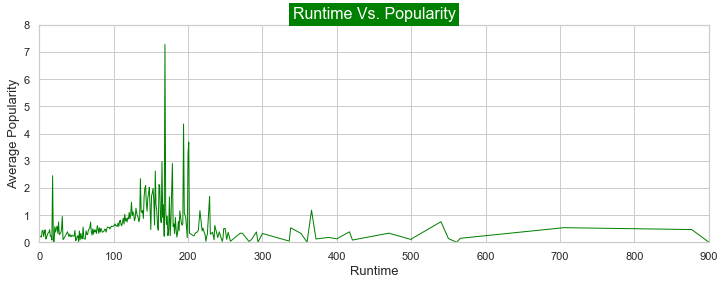

In [21]:
#use groupby function and group the data according to their runtime.
#make a plot using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
df.groupby('runtime')['popularity'].mean().plot(figsize = (12,4),xticks=np.arange(0,1000,100),linewidth=1, color='green')

#setup the title of the figure
plt.title("runtime vs. popularity".title(),fontsize=16,color='white',bbox=dict(facecolor='green',edgecolor='none'))

#setup the x-label and y-label of the plot.
plt.xlabel('runtime'.title(),fontsize = 13)
plt.ylabel('average popularity'.title(),fontsize = 13)
plt.ylim(0,8)

#setup the figure size.
sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("whitegrid")

Runtime between 100 and 200 minutes is the most poular runtime.

<a id='conclusions'></a>
## Conclusions


The exploration of the data shows the following results.
1. 'Avatar', 'Star wars' and 'Titanic' are top profiatale mobies.
1. 'The Warriors Way', 'The Long Ranger' and 'The Wolfman' are movies with highest loss.
1. 'The Worier's way' and 'The Pirates of Crabians' are top movies with highest budget.
1. The story of Film: The Odessy and Taken are two movies with longest runtime. The first on is 15 hours long.
1. Number of movies released are increasing each year.
1. Average runtime of the movies are decreasing each year.
1. Average profit is increasing each year.
1. Movies between 100 and 200 minutes runtime are most popular.

### Limitations
Corelation deosn't mean corelation. Some vales may be statically realted be proved but there is no way to measure the causation with 100 present probability. This code is not the ideal implimentation of the analysis process. Further imporvement could be done to boost the speed of the anlysis.